## Parts Of Speech Tags:
Part-of-speech (POS) tagging is a popular Natural Language Processing process which refers to categorizing words in a text (corpus) in correspondence with a particular part of speech, depending on the definition of the word and its context.

<img target="_blank" src="https://user-images.githubusercontent.com/32620288/147389222-d3d115c3-8c17-4a4c-8d3d-2cff393a6e79.png" width=500; height=500>

we can see each word has its own lexical term written underneath, however, having to constantly write out these full terms when we perform text analysis can very quickly become cumbersome — especially as the size of the corpus grows. Thence, we use a short representation referred to as “tags” to represent the categories.

As earlier mentioned, the process of assigning a specific tag to a word in our corpus is referred to as part-of-speech tagging (POS tagging for short) since the POS tags are used to describe the lexical terms that we have within our text.

<img target="_blank" src="https://user-images.githubusercontent.com/32620288/147389334-d5232b73-e7e6-42b1-bb4a-a1a8ac8902ba.png" width=700; height=700>
Grid displaying different types of lexical terms, their tags, and random examples

Part-of-speech tags describe the characteristic structure of lexical terms within a sentence or text, therefore, we can use them for making assumptions about semantics. Other applications of POS tagging include:
* Named Entity Recognition
* Co-reference Resolution
* Speech Recognition

When we perform POS tagging, it’s often the case that our tagger will encounter words that were not within the vocabulary that was used. Consequently, augmenting your dataset to include unknown word tokens will aid the tagger in selecting appropriate tags for those words.

https://towardsdatascience.com/part-of-speech-tagging-for-beginners-3a0754b2ebba

“Why not tell someone?”, imaging the sentence is truncated to “Why not tell … ” and we want to determine whether the following word in the sentence is a noun, verb, adverb, or some other part-of-speech.

Now, if you are familiar with English, you’d instantly identify the verb and assume that it is more likely the word is followed by a noun rather than another verb. Therefore, the idea as shown in this example is that the POS tag that is assigned to the next word is dependent on the POS tag of the previous word.

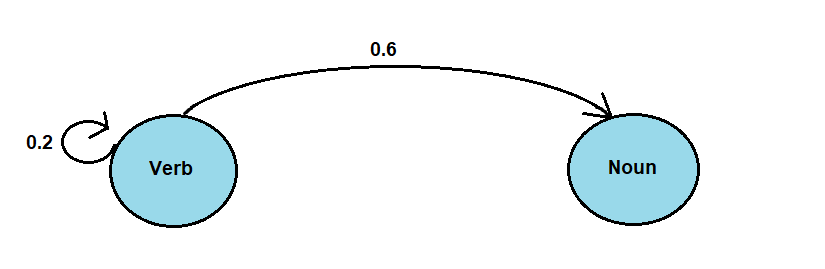

By associating numbers with each arrow direction, of which imply the likelihood of the next word given the current word, we can say there is a higher likelihood the next word in our sentence would be a noun since it has a higher likelihood than the next word being a verb if we are currently on a verb.

The image in above Figure, is a great example of how a Markov Model works on a very small scale.

Given this example, we may now describe markov models as “a stochastic model used to model randomly changing systems. It is assumed that future states depend only on the current state, not on the events that occurred before it (that is, it assumes the Markov property).” . Therefore to get the probability of the next event, it needs only the states of the current event.

We can depict a markov chain as directed graph:
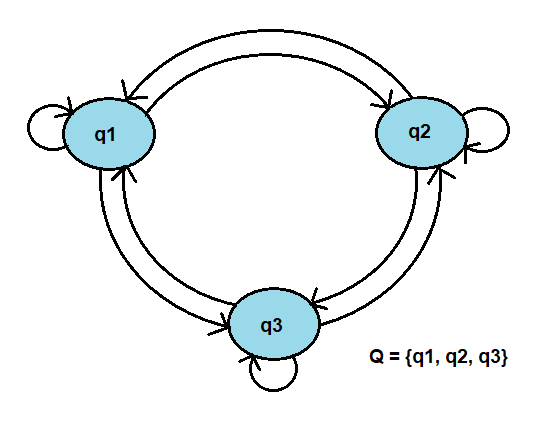
The lines with arrows are an indication of the direction hence the name “directed graph”, and the circles may be regarded as the states of the model — a state is simply the condition of the present moment.
We could use this Markov model to perform POS. Considering we view a sentence as a sequence of words, we can represent the sequence as a graph where we use the POS tags as the events that occur which would be illustrated by the stats of our model graph.

For example, q1 in above Figure  would become NN indicating a noun, q2 would be VB which is short for verb, and q3 would be O signifying all other tags that are not NN or VB. Like in Figure 3, the directed lines would be given a transition probability that define the probability of going from one state to the next.

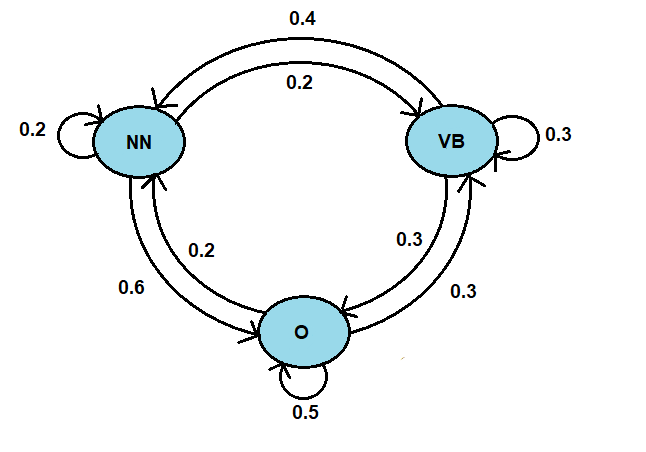

A more compact way to store the transition and state probabilities is using a table, better known as a “transition matrix”.

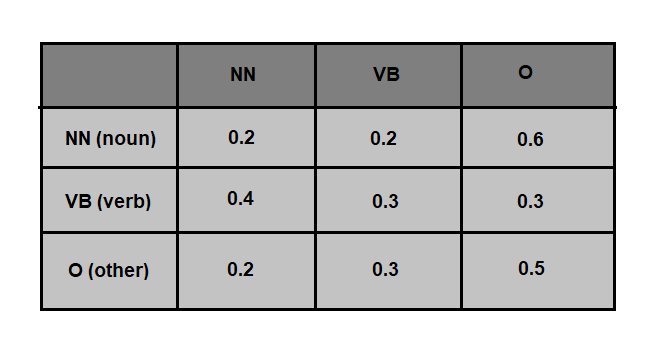

Notice this model only tells us the transition probability of one state to the next when we know the previous word. Hence, this model does not show us what to do when there is no previous word. To handle this case, we add what is known as the “initial state”.
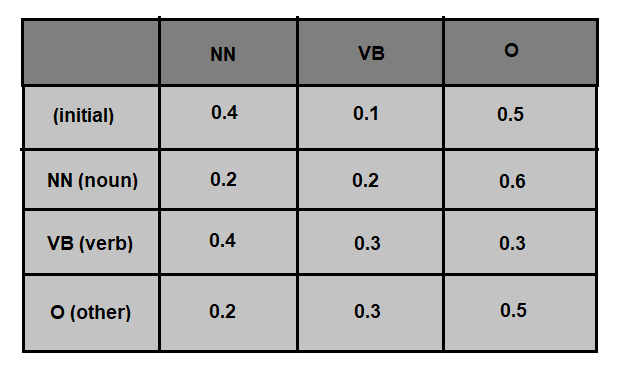

You may now be wondering, how did we populate the transition matrix? Great Question. I will use 3 sentences for our corpus. The first is “<s> in a station of the metro”, “<s> the apparition of these faces in the crowd”, “<s> petals on a wet, black bough.” (Note these are the same sentences used in the course). Next, we will break down how to populate the matrix into steps:
    
1. Count occurrences of tag pairs in the training dataset
    
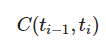
    
At the end of step one, our table would look something like this…
    
 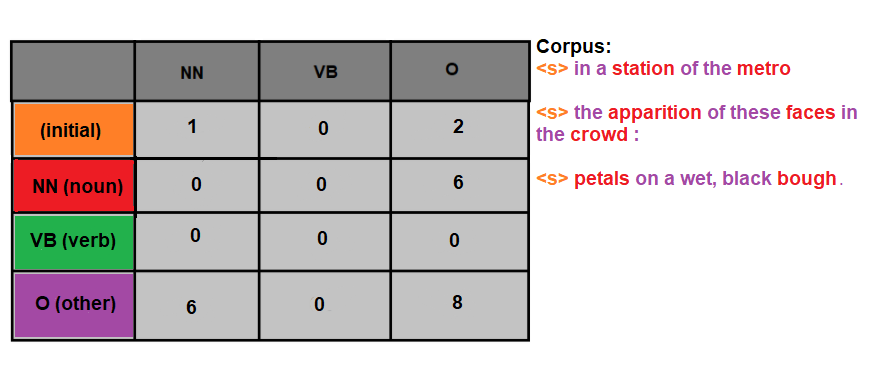
    
2. Calculate the probability of using the counts
    
    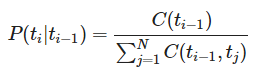
    
 Appling the formula in Figure 10 to the table in Figure 9, our new table would look as follow.
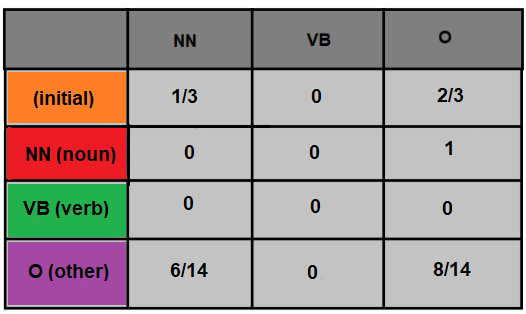
    
You may notice that there are many 0’s in our transition matrix which would result in our model being incapable of generalizing to other text that may contain verbs. To overcome this problem, we add smoothing.
Adding smoothing requires we slightly we adjust the formula from Figure(Calculate probabilities using the counts )  by adding a small value, epsilon, to each of the counts in the numerator, and add N * epsilon to the denominator, such that the row sum still adds up to 1.
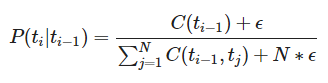
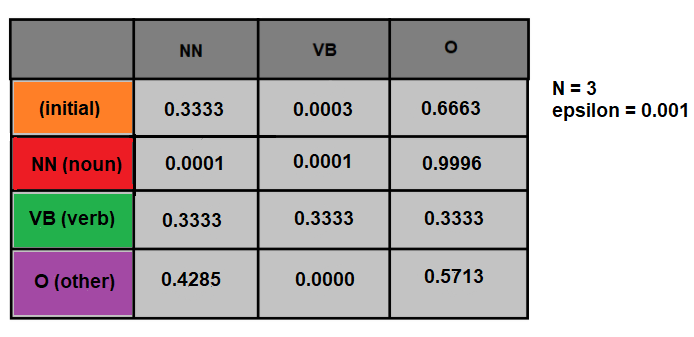
Note: In a real world example, applying smoothing to the initial probabilities (the first row) as this would allow for a sentence to possibly start with any POS tag.
    
Hidden Markov Model
Hidden Markov Model (HMM) is a statistical Markov model in which the system being modeled is assumed to be a Markov process with unobservable (“hidden”) states (Source: Wikipedia). In our case, the unobservable states are the POS tags of a word.
    
If we rewind back to our Markov Model in Figure (Example of Markov Model to perform POS tagging.), we see that the model has states for part of speech such as VB for verb and NN for a noun. We may now think of these as hidden states since they are not directly observable from the corpus. Though a human may be capable of deciphering what POS applies to a specific word, a machine only sees the text, hence making it observable, and is unaware of whether that word POS tag is noun, verb, or something else which in-turn means they are unobservable.
    
Both the Markov Model and Hidden Markov model have transition probabilities that describe the transition from one hidden state to the next, however, the Hidden Markov Model also has something known as emission probabilities.
The emission probabilities describe the transitions from the hidden states in the model — remember the hidden states are the POS tags — to the observable states — remember the observable states are the words.
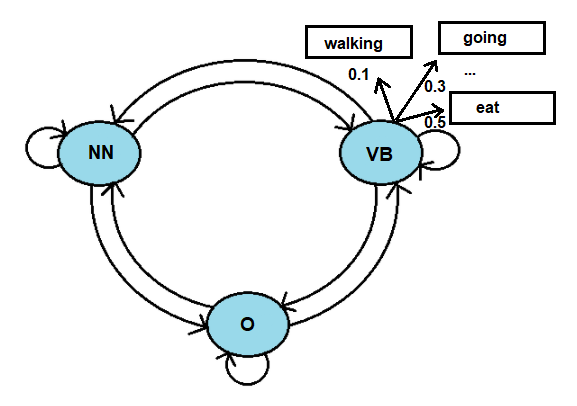
    
In the above Figure  we see that for the hidden VB state we have observable states. The emission probability from the hidden states VB to the observable eat is 0.5 hence there is a 50% chance that the model would output this word when the current hidden state is VB.
We can also represent the emission probabilities as a table
    
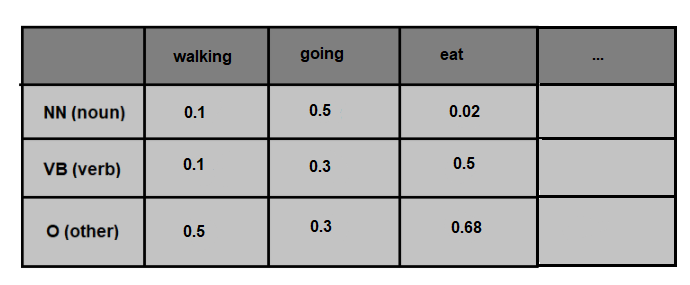
    
Similar to the transition probability matrix, the row values must sum to 1. Also, the reason all of our POS tags emission probabilities are more than 0 since words can have a different POS tag depending on the context.
    
To populate the emission matrix, we’d follow a procedure very similar to the way we’d populate the transition matrix. We’d first count how often a word is tagged with a specific tag.
    
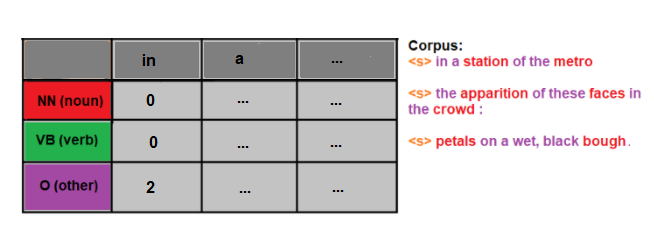
    
Since the process is so similar to calculating the transition matrix, I will instead provide you with the formula with smoothing applied to see how it would be calculated.
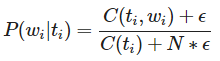


In [10]:
## Import Library
import os

In [11]:
# Check working directory
os.getcwd()

'C:\\Users\\divak'

In [12]:
# load the text data or text file
text_file = open('pos_text.txt', 'r')

In [13]:
# Check datatype
type(text_file)

_io.TextIOWrapper

### Read the text file or text data

In [14]:
text = text_file.read()
text

"Coronaviruses are a group of related RNA viruses that cause diseases in mammals and birds. In humans, these viruses cause respiratory tract infections that can range from mild to lethal. Mild illnesses include some cases of the common cold (which is also caused by other viruses, predominantly rhinoviruses), while more lethal varieties can cause SARS, MERS, and COVID-19. Symptoms in other species vary: in chickens, they cause an upper respiratory tract disease, while in cows and pigs they cause diarrhea. There are as yet no vaccines or antiviral drugs to prevent or treat human coronavirus infections.\n\nCoronaviruses constitute the subfamily Orthocoronavirinae, in the family Coronaviridae, order Nidovirales, and realm Riboviria.[5][6] They are enveloped viruses with a positive-sense single-stranded RNA genome and a nucleocapsid of helical symmetry.[7] The genome size of coronaviruses ranges from approximately 26 to 32 kilobases, one of the largest among RNA viruses.[8] They have charac

### Breaking down large piece of text data into paragraphs

In [15]:
text_paragraphs = text.split('\n')
print(text_paragraphs)

['Coronaviruses are a group of related RNA viruses that cause diseases in mammals and birds. In humans, these viruses cause respiratory tract infections that can range from mild to lethal. Mild illnesses include some cases of the common cold (which is also caused by other viruses, predominantly rhinoviruses), while more lethal varieties can cause SARS, MERS, and COVID-19. Symptoms in other species vary: in chickens, they cause an upper respiratory tract disease, while in cows and pigs they cause diarrhea. There are as yet no vaccines or antiviral drugs to prevent or treat human coronavirus infections.', '', 'Coronaviruses constitute the subfamily Orthocoronavirinae, in the family Coronaviridae, order Nidovirales, and realm Riboviria.[5][6] They are enveloped viruses with a positive-sense single-stranded RNA genome and a nucleocapsid of helical symmetry.[7] The genome size of coronaviruses ranges from approximately 26 to 32 kilobases, one of the largest among RNA viruses.[8] They have c

In [16]:
# Check the lengtho of paragraphs
len(text_paragraphs)

11

### List Comprehension

In [17]:
new_para = [text for text in text_paragraphs if len(text)>5]
new_para

['Coronaviruses are a group of related RNA viruses that cause diseases in mammals and birds. In humans, these viruses cause respiratory tract infections that can range from mild to lethal. Mild illnesses include some cases of the common cold (which is also caused by other viruses, predominantly rhinoviruses), while more lethal varieties can cause SARS, MERS, and COVID-19. Symptoms in other species vary: in chickens, they cause an upper respiratory tract disease, while in cows and pigs they cause diarrhea. There are as yet no vaccines or antiviral drugs to prevent or treat human coronavirus infections.',
 'Coronaviruses constitute the subfamily Orthocoronavirinae, in the family Coronaviridae, order Nidovirales, and realm Riboviria.[5][6] They are enveloped viruses with a positive-sense single-stranded RNA genome and a nucleocapsid of helical symmetry.[7] The genome size of coronaviruses ranges from approximately 26 to 32 kilobases, one of the largest among RNA viruses.[8] They have char

In [18]:
len(new_para)

6

In [19]:
### Word Tokenization

In [20]:
para = 'Coronaviruses are a group of related RNA viruses that cause diseases in mammals and birds. In humans, these viruses cause respiratory tract infections that can range from mild to lethal. Mild illnesses include some cases of the common cold (which is also caused by other viruses, predominantly rhinoviruses), while more lethal varieties can cause SARS, MERS, and COVID-19. Symptoms in other species vary: in chickens, they cause an upper respiratory tract disease, while in cows and pigs they cause diarrhea. There are as yet no vaccines or antiviral drugs to prevent or treat human coronavirus infections.'

In [21]:
from nltk import word_tokenize

In [22]:
word_token = word_tokenize(para)
word_token

['Coronaviruses',
 'are',
 'a',
 'group',
 'of',
 'related',
 'RNA',
 'viruses',
 'that',
 'cause',
 'diseases',
 'in',
 'mammals',
 'and',
 'birds',
 '.',
 'In',
 'humans',
 ',',
 'these',
 'viruses',
 'cause',
 'respiratory',
 'tract',
 'infections',
 'that',
 'can',
 'range',
 'from',
 'mild',
 'to',
 'lethal',
 '.',
 'Mild',
 'illnesses',
 'include',
 'some',
 'cases',
 'of',
 'the',
 'common',
 'cold',
 '(',
 'which',
 'is',
 'also',
 'caused',
 'by',
 'other',
 'viruses',
 ',',
 'predominantly',
 'rhinoviruses',
 ')',
 ',',
 'while',
 'more',
 'lethal',
 'varieties',
 'can',
 'cause',
 'SARS',
 ',',
 'MERS',
 ',',
 'and',
 'COVID-19',
 '.',
 'Symptoms',
 'in',
 'other',
 'species',
 'vary',
 ':',
 'in',
 'chickens',
 ',',
 'they',
 'cause',
 'an',
 'upper',
 'respiratory',
 'tract',
 'disease',
 ',',
 'while',
 'in',
 'cows',
 'and',
 'pigs',
 'they',
 'cause',
 'diarrhea',
 '.',
 'There',
 'are',
 'as',
 'yet',
 'no',
 'vaccines',
 'or',
 'antiviral',
 'drugs',
 'to',
 'prevent'

In [23]:
len(word_token)

111

### StopWords

In [24]:
# Import Library
from nltk.corpus import stopwords

In [25]:
stop_words = set(stopwords.words('english'))

In [26]:
stop_words.update(['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}']) # remove it if you need punctuation

In [27]:
word_token = [word for word in word_token if word not in stop_words]
word_token

['Coronaviruses',
 'group',
 'related',
 'RNA',
 'viruses',
 'cause',
 'diseases',
 'mammals',
 'birds',
 'In',
 'humans',
 'viruses',
 'cause',
 'respiratory',
 'tract',
 'infections',
 'range',
 'mild',
 'lethal',
 'Mild',
 'illnesses',
 'include',
 'cases',
 'common',
 'cold',
 'also',
 'caused',
 'viruses',
 'predominantly',
 'rhinoviruses',
 'lethal',
 'varieties',
 'cause',
 'SARS',
 'MERS',
 'COVID-19',
 'Symptoms',
 'species',
 'vary',
 'chickens',
 'cause',
 'upper',
 'respiratory',
 'tract',
 'disease',
 'cows',
 'pigs',
 'cause',
 'diarrhea',
 'There',
 'yet',
 'vaccines',
 'antiviral',
 'drugs',
 'prevent',
 'treat',
 'human',
 'coronavirus',
 'infections']

## POS Tagging

In [28]:
# Import library
from nltk import pos_tag

In [29]:
pos_tagging = pos_tag(word_token)

In [30]:
pos_tagging

[('Coronaviruses', 'NNS'),
 ('group', 'NN'),
 ('related', 'VBD'),
 ('RNA', 'NNP'),
 ('viruses', 'NNS'),
 ('cause', 'VBP'),
 ('diseases', 'VBZ'),
 ('mammals', 'NNS'),
 ('birds', 'NNS'),
 ('In', 'IN'),
 ('humans', 'NNS'),
 ('viruses', 'NNS'),
 ('cause', 'VBP'),
 ('respiratory', 'JJ'),
 ('tract', 'NN'),
 ('infections', 'NNS'),
 ('range', 'VBP'),
 ('mild', 'JJ'),
 ('lethal', 'JJ'),
 ('Mild', 'NNP'),
 ('illnesses', 'NNS'),
 ('include', 'VBP'),
 ('cases', 'NNS'),
 ('common', 'JJ'),
 ('cold', 'NN'),
 ('also', 'RB'),
 ('caused', 'VBD'),
 ('viruses', 'NNS'),
 ('predominantly', 'RB'),
 ('rhinoviruses', 'VBZ'),
 ('lethal', 'JJ'),
 ('varieties', 'NNS'),
 ('cause', 'VBP'),
 ('SARS', 'JJ'),
 ('MERS', 'NNP'),
 ('COVID-19', 'NNP'),
 ('Symptoms', 'NNP'),
 ('species', 'NNS'),
 ('vary', 'VBP'),
 ('chickens', 'NNS'),
 ('cause', 'VBP'),
 ('upper', 'JJ'),
 ('respiratory', 'NN'),
 ('tract', 'NN'),
 ('disease', 'NN'),
 ('cows', 'VBZ'),
 ('pigs', 'NNS'),
 ('cause', 'NN'),
 ('diarrhea', 'NN'),
 ('There', 'EX'),

--------------------------------------------------------------------

In [31]:
import nltk
nltk.download('tagsets')

[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\divak\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping help\tagsets.zip.


True

In [32]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\divak\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [33]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [34]:
# POS Tagging Example1

from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

my_text = "James Smith lives in the United States"

tokens = pos_tag(word_tokenize(my_text))
print(tokens)

[('James', 'NNP'), ('Smith', 'NNP'), ('lives', 'VBZ'), ('in', 'IN'), ('the', 'DT'), ('United', 'NNP'), ('States', 'NNPS')]


In [35]:
# POS Tagging Example2

sent = "Marry is driving a big car."
sent_tokens = word_tokenize(sent)

for token in sent_tokens:
    print(nltk.pos_tag([token]))

[('Marry', 'NN')]
[('is', 'VBZ')]
[('driving', 'VBG')]
[('a', 'DT')]
[('big', 'JJ')]
[('car', 'NN')]
[('.', '.')]


In [36]:
# POS Tagging Example2

sent2 = "Rohit eats a banana."

from nltk.tokenize import RegexpTokenizer
Regex_tokenizer = RegexpTokenizer("(?u)\W+|\$[\d\.]+|\S+")

regex_tokens = Regex_tokenizer.tokenize(sent2)
regex_tokens

# POS Tagging

regex_tag = nltk.pos_tag(regex_tokens)
regex_tag

[('Rohit', 'NNP'),
 (' ', 'NNP'),
 ('eats', 'VBZ'),
 (' ', 'VBP'),
 ('a', 'DT'),
 (' ', 'NN'),
 ('banana.', 'NN')]

# THE END